✅ Summary table saved as 'evaluation_summary.csv'


/home/victor.moreno/miniconda3/envs/SSL_Spoofing/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


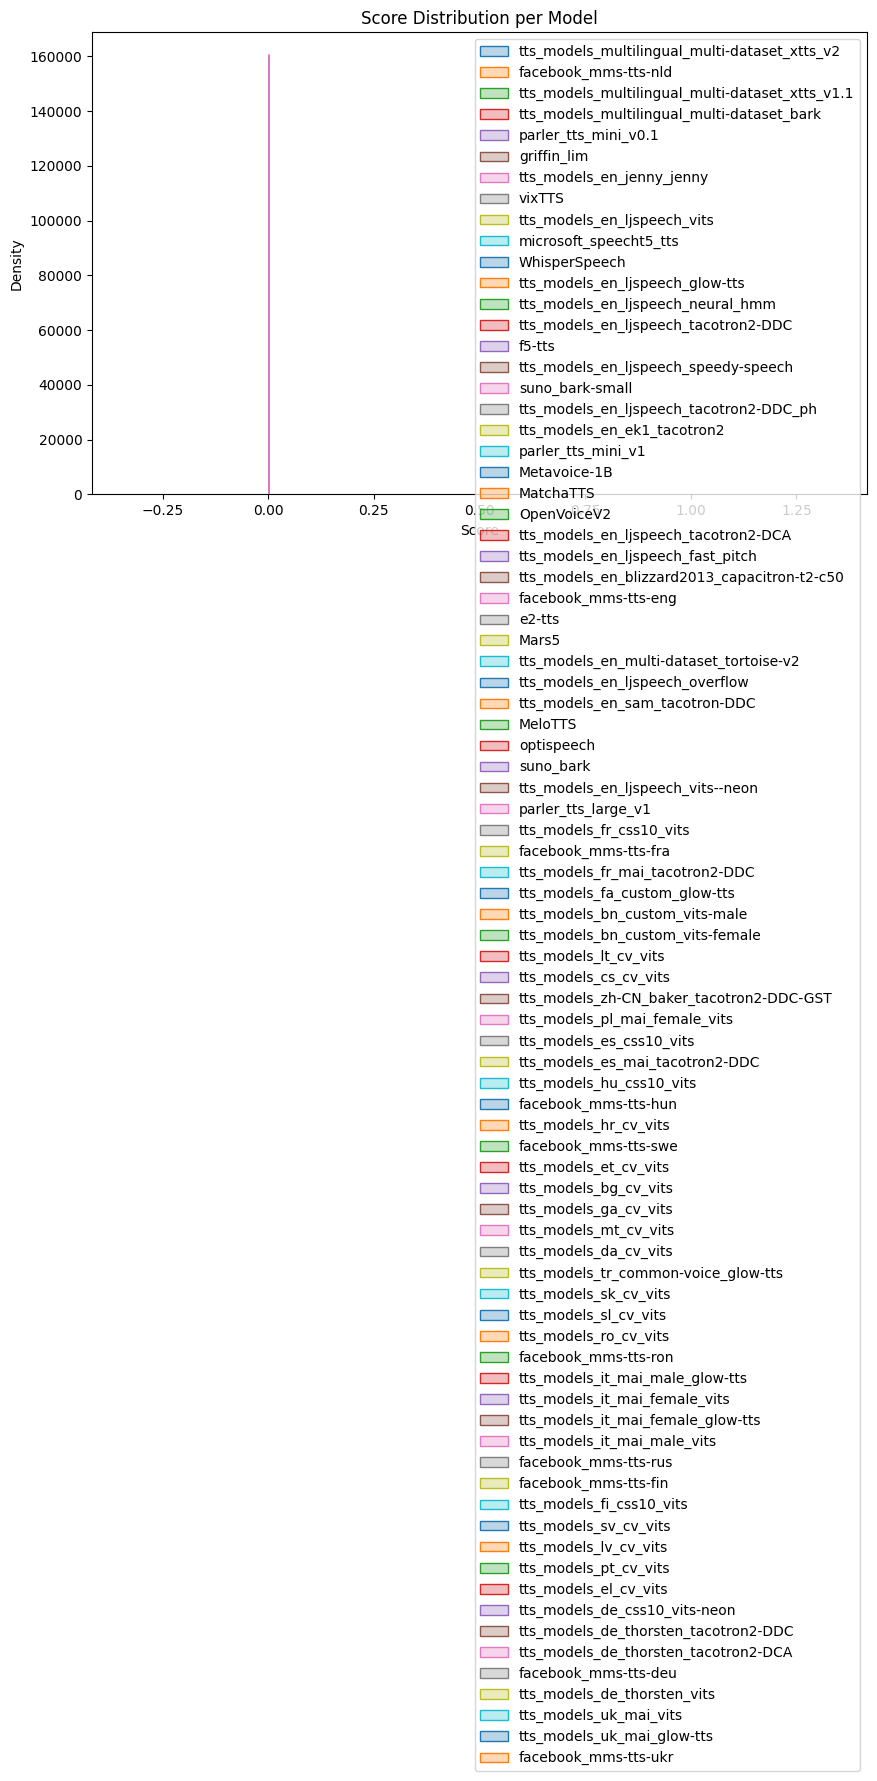

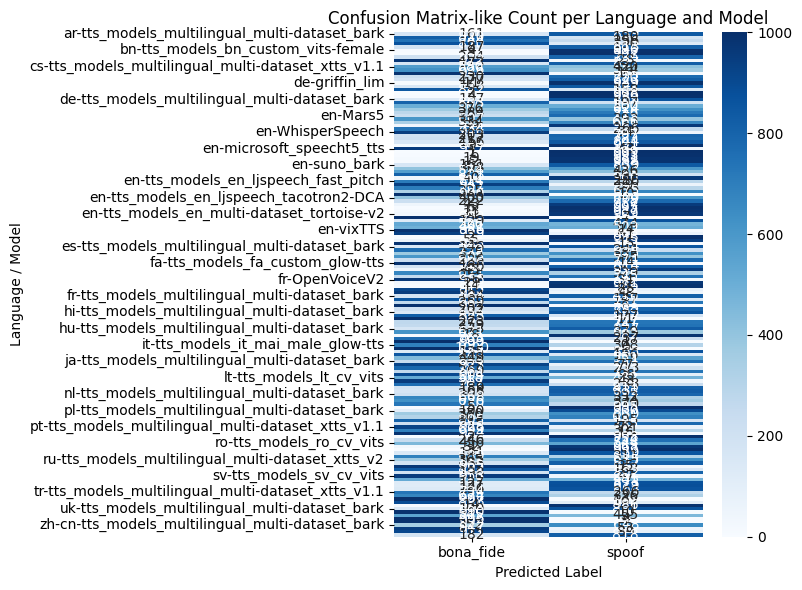

✅ Plots saved: 'score_distribution_per_model.png' and 'confusion_matrix_like.png'


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load the JSON file ===
json_path = "/home/victor.moreno/dl-29_backup/spoof/mlaad_evaluation_results/evaluation_results.json"

with open(json_path, 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# === Summary table per language and model ===
summary = df.groupby(['language', 'model']).agg(
    count=('score', 'count'),
    mean_score=('score', 'mean'),
    std_score=('score', 'std'),
    min_score=('score', 'min'),
    max_score=('score', 'max'),
    median_score=('score', 'median')
).reset_index()

# Save the summary as CSV
summary.to_csv("evaluation_summary.csv", index=False)
print("✅ Summary table saved as 'evaluation_summary.csv'")

# === Plot histogram of scores per model ===
plt.figure(figsize=(10, 6))
for model in df['model'].unique():
    sns.kdeplot(df[df['model'] == model]['score'], label=model, fill=True, alpha=0.3)
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Score Distribution per Model")
plt.legend()
plt.tight_layout()
plt.savefig("score_distribution_per_model.png")
plt.show()

# === Plot confusion-matrix-like heatmap ===
# Binarize scores (e.g., threshold=0.5)
threshold = 0.5
df['prediction'] = df['score'].apply(lambda x: 'spoof' if x >= threshold else 'bona_fide')

conf_matrix = pd.crosstab([df['language'], df['model']], df['prediction'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix-like Count per Language and Model")
plt.ylabel("Language / Model")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.savefig("confusion_matrix_like.png")
plt.show()

print("✅ Plots saved: 'score_distribution_per_model.png' and 'confusion_matrix_like.png'")


✅ Matrix saved as 'model_language_mean_scores.csv'


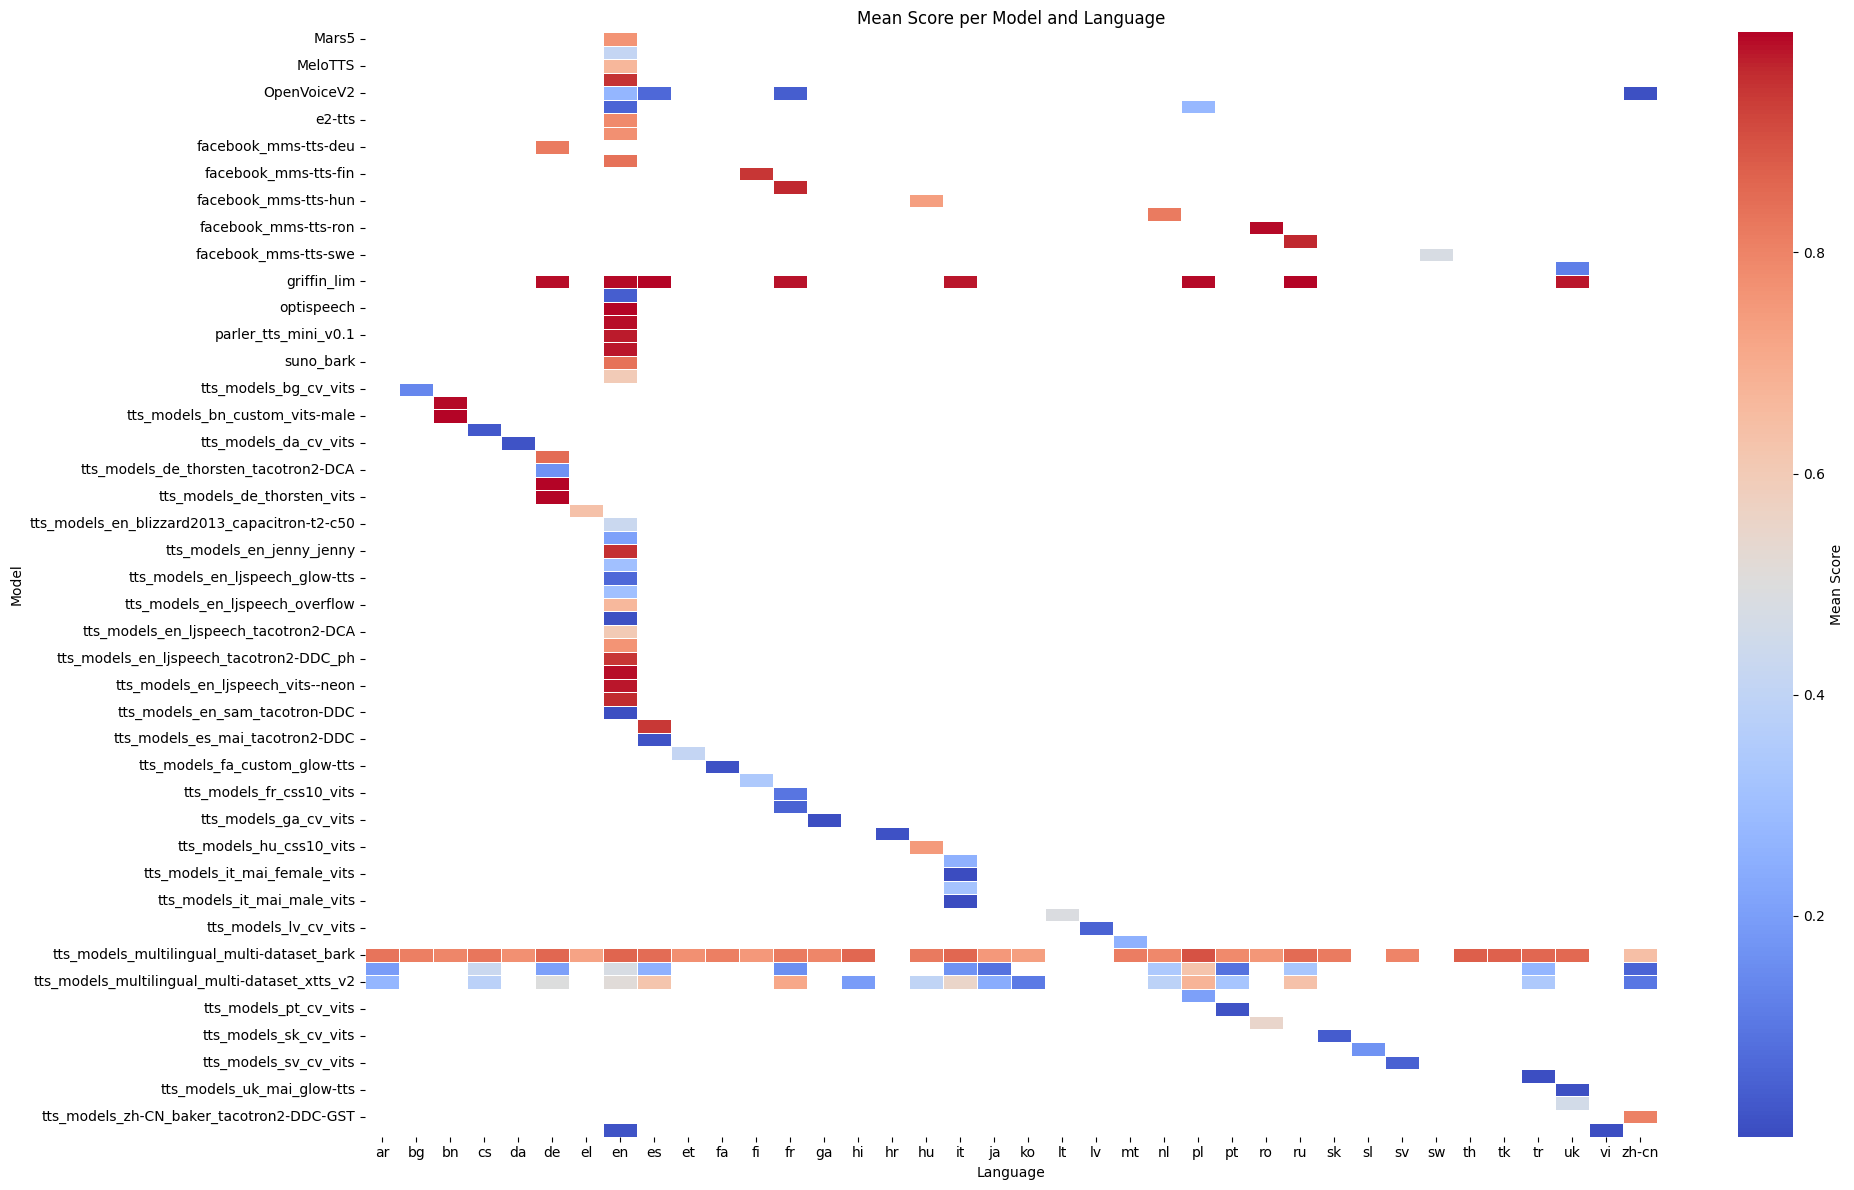

✅ Heatmap saved as 'model_language_heatmap.png'


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load JSON file ===
json_path = "/home/victor.moreno/dl-29_backup/spoof/mlaad_evaluation_results/evaluation_results.json"

with open(json_path, 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# === Create pivot table (models X languages with mean scores) ===
pivot_table = df.pivot_table(
    index='model',
    columns='language',
    values='score',
    aggfunc='mean'
)

# Save to CSV for reference
pivot_table.to_csv("model_language_mean_scores.csv")
print("✅ Matrix saved as 'model_language_mean_scores.csv'")

# === Plot heatmap ===
plt.figure(figsize=(20, 12))  # Adjust size as needed
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Mean Score'})
plt.title("Mean Score per Model and Language")
plt.xlabel("Language")
plt.ylabel("Model")
plt.tight_layout()
plt.savefig("model_language_heatmap.png")
plt.show()

print("✅ Heatmap saved as 'model_language_heatmap.png'")


✅ Matrix saved as 'model_language_mean_scores.csv'


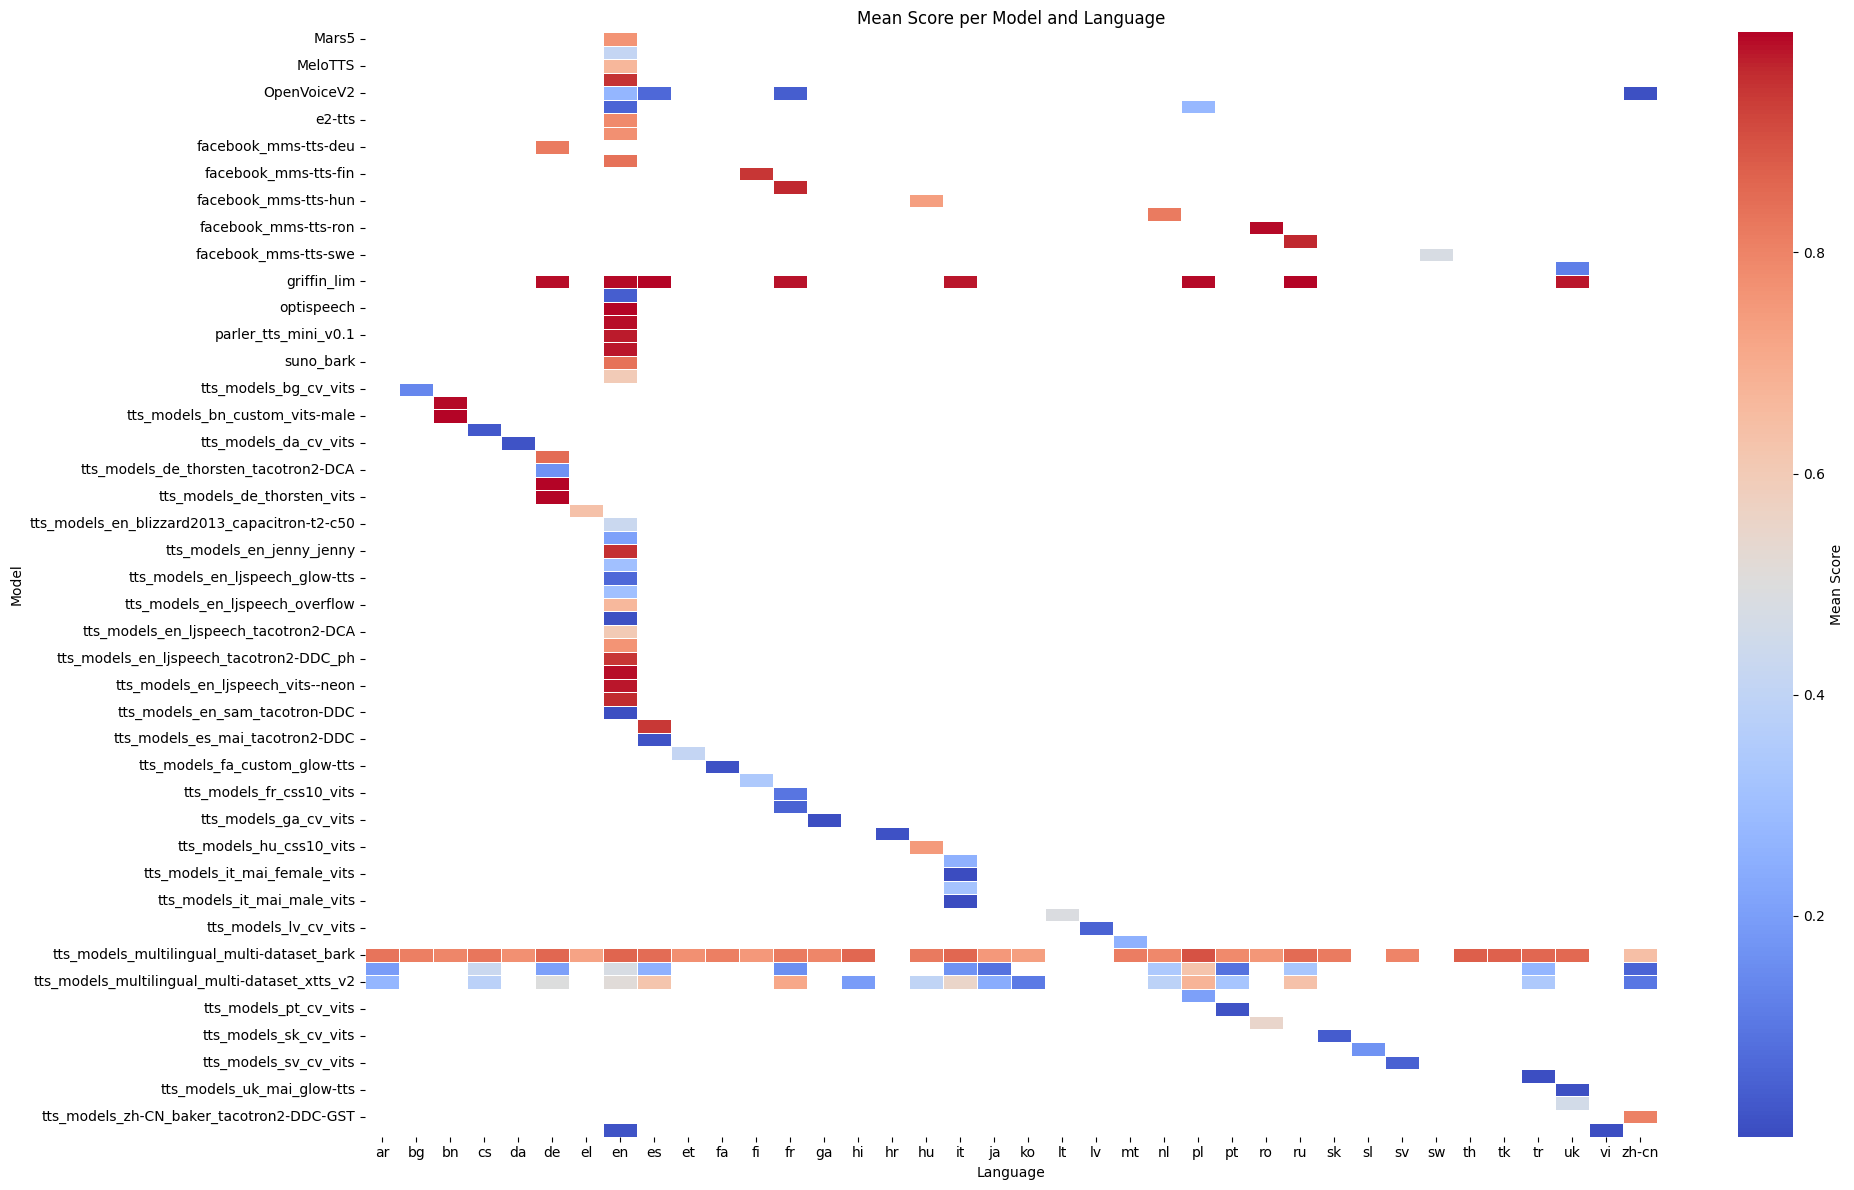

✅ Heatmap saved as 'model_language_heatmap.png'


In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load JSON file ===
json_path = "/home/victor.moreno/dl-29_backup/spoof/mlaad_evaluation_results/evaluation_results.json"

with open(json_path, 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# === Create pivot table (models X languages with mean scores) ===
pivot_table = df.pivot_table(
    index='model',
    columns='language',
    values='score',
    aggfunc='mean'
)

# Save to CSV for reference
pivot_table.to_csv("model_language_mean_scores.csv")
print("✅ Matrix saved as 'model_language_mean_scores.csv'")

# === Plot heatmap ===
plt.figure(figsize=(20, 12))  # Adjust size as needed
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Mean Score'})
plt.title("Mean Score per Model and Language")
plt.xlabel("Language")
plt.ylabel("Model")
plt.tight_layout()
plt.savefig("model_language_heatmap.png")
plt.show()

print("✅ Heatmap saved as 'model_language_heatmap.png'")


In [4]:
import json
import pandas as pd

# === Carregar o JSON ===
json_path = "/home/victor.moreno/dl-29_backup/spoof/mlaad_evaluation_results/evaluation_results.json"

with open(json_path, 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# === Criar matriz modelos x linguagens com a média dos scores ===
pivot_table = df.pivot_table(
    index='model',
    columns='language',
    values='score',
    aggfunc='mean'
)

# Opcional: arredondar os valores para 4 casas decimais
pivot_table = pivot_table.round(4)

# Mostrar a tabela no console
print("\n✅ Tabela de médias (modelos x linguagens):")
print(pivot_table)

# Se quiser salvar também em CSV:
pivot_table.to_csv("model_language_mean_scores.csv")



✅ Tabela de médias (modelos x linguagens):
language                                  ar  bg  bn  cs  da  de  el      en  \
model                                                                          
Mars5                                    NaN NaN NaN NaN NaN NaN NaN  0.7647   
MatchaTTS                                NaN NaN NaN NaN NaN NaN NaN  0.4106   
MeloTTS                                  NaN NaN NaN NaN NaN NaN NaN  0.6693   
Metavoice-1B                             NaN NaN NaN NaN NaN NaN NaN  0.9504   
OpenVoiceV2                              NaN NaN NaN NaN NaN NaN NaN  0.2696   
...                                       ..  ..  ..  ..  ..  ..  ..     ...   
tts_models_tr_common-voice_glow-tts      NaN NaN NaN NaN NaN NaN NaN     NaN   
tts_models_uk_mai_glow-tts               NaN NaN NaN NaN NaN NaN NaN     NaN   
tts_models_uk_mai_vits                   NaN NaN NaN NaN NaN NaN NaN     NaN   
tts_models_zh-CN_baker_tacotron2-DDC-GST NaN NaN NaN NaN NaN NaN NaN     NaN

# Evaluating results per archictecture

In [5]:
import pandas as pd
# Caminho do arquivo CSV
csv_path = "/home/victor.moreno/dl-29_backup/spoof/dataset/code/mlaad_meta_with_scores_and_gender.csv"

# Leitura do arquivo com separador '|'
df = pd.read_csv(csv_path, sep='|')

# Exibir as primeiras linhas para verificação
df.head()


,original_file,language,is_original_language,duration,training_data,model_name,architecture,transcript,language_folder,model_folder,meta_csv_path,absolute_audio_path,score,gender
0,en_US/by_book/female/mary_ann/northandsouth/wa...,nl,False,8.023,multi-dataset,tts_models/multilingual/multi-dataset/xtts_v2,xtts_v2,"Nee, ik weet het niet, zei hij, roodheid. En i...",nl,tts_models_multilingual_multi-dataset_xtts_v2,/home/victor.moreno/dl-29_backup/spoof/dataset...,/home/victor.moreno/dl-29_backup/spoof/dataset...,0.894469,female
1,en_US/by_book/male/elliot_miller/pink_fairy_bo...,nl,False,10.017,multi-dataset,tts_models/multilingual/multi-dataset/xtts_v2,xtts_v2,"Ay, zei de boer, nu zie ik hoe slim onze klerk...",nl,tts_models_multilingual_multi-dataset_xtts_v2,/home/victor.moreno/dl-29_backup/spoof/dataset...,/home/victor.moreno/dl-29_backup/spoof/dataset...,0.927452,male
2,en_US/by_book/female/mary_ann/northandsouth/wa...,nl,False,5.291,multi-dataset,tts_models/multilingual/multi-dataset/xtts_v2,xtts_v2,"Die eindelijk bijna met tegenzin antwoordde, z...",nl,tts_models_multilingual_multi-dataset_xtts_v2,/home/victor.moreno/dl-29_backup/spoof/dataset...,/home/victor.moreno/dl-29_backup/spoof/dataset...,0.000452,female
3,en_US/by_book/male/elliot_miller/poisoned_pen/...,nl,False,8.940,multi-dataset,tts_models/multilingual/multi-dataset/xtts_v2,xtts_v2,Dat zou een slecht spel zijn geweest. Zijn zaa...,nl,tts_models_multilingual_multi-dataset_xtts_v2,/home/victor.moreno/dl-29_backup/spoof/dataset...,/home/victor.moreno/dl-29_backup/spoof/dataset...,0.999777,male
4,en_US/by_book/female/mary_ann/northandsouth/wa...,nl,False,10.763,multi-dataset,tts_models/multilingual/multi-dataset/xtts_v2,xtts_v2,"Boucher stond, met beide handen op de nogal ho...",nl,tts_models_multilingual_multi-dataset_xtts_v2,/home/victor.moreno/dl-29_backup/spoof/dataset...,/home/victor.moreno/dl-29_backup/spoof/dataset...,0.027074,female


In [6]:
df['architecture'].value_counts()

bark                      32000
vits                      25000
xtts_v2                   17000
xtts_v1.1                 14000
griffin_lim                8000
glow-tts                   6000
tacotron2-DDC              4000
OpenVoiceV2                4000
vixTTS                     2000
tacotron2-DCA              2000
WhisperSpeech              2000
parler_tts_large_v1        1000
suno/bark                  1000
vits--neon                 1000
vits-male                  1000
optispeech                 1000
MeloTTS                    1000
facebook/mms-tts-fra       1000
facebook/mms-tts-ron       1000
vits-female                1000
tacotron2-DDC-GST          1000
facebook/mms-tts-hun       1000
facebook/mms-tts-swe       1000
overflow                   1000
facebook/mms-tts-rus       1000
facebook/mms-tts-fin       1000
vits-neon                  1000
facebook/mms-tts-deu       1000
tacotron-DDC               1000
fast_pitch                 1000
tortoise-v2                1000
tacotron

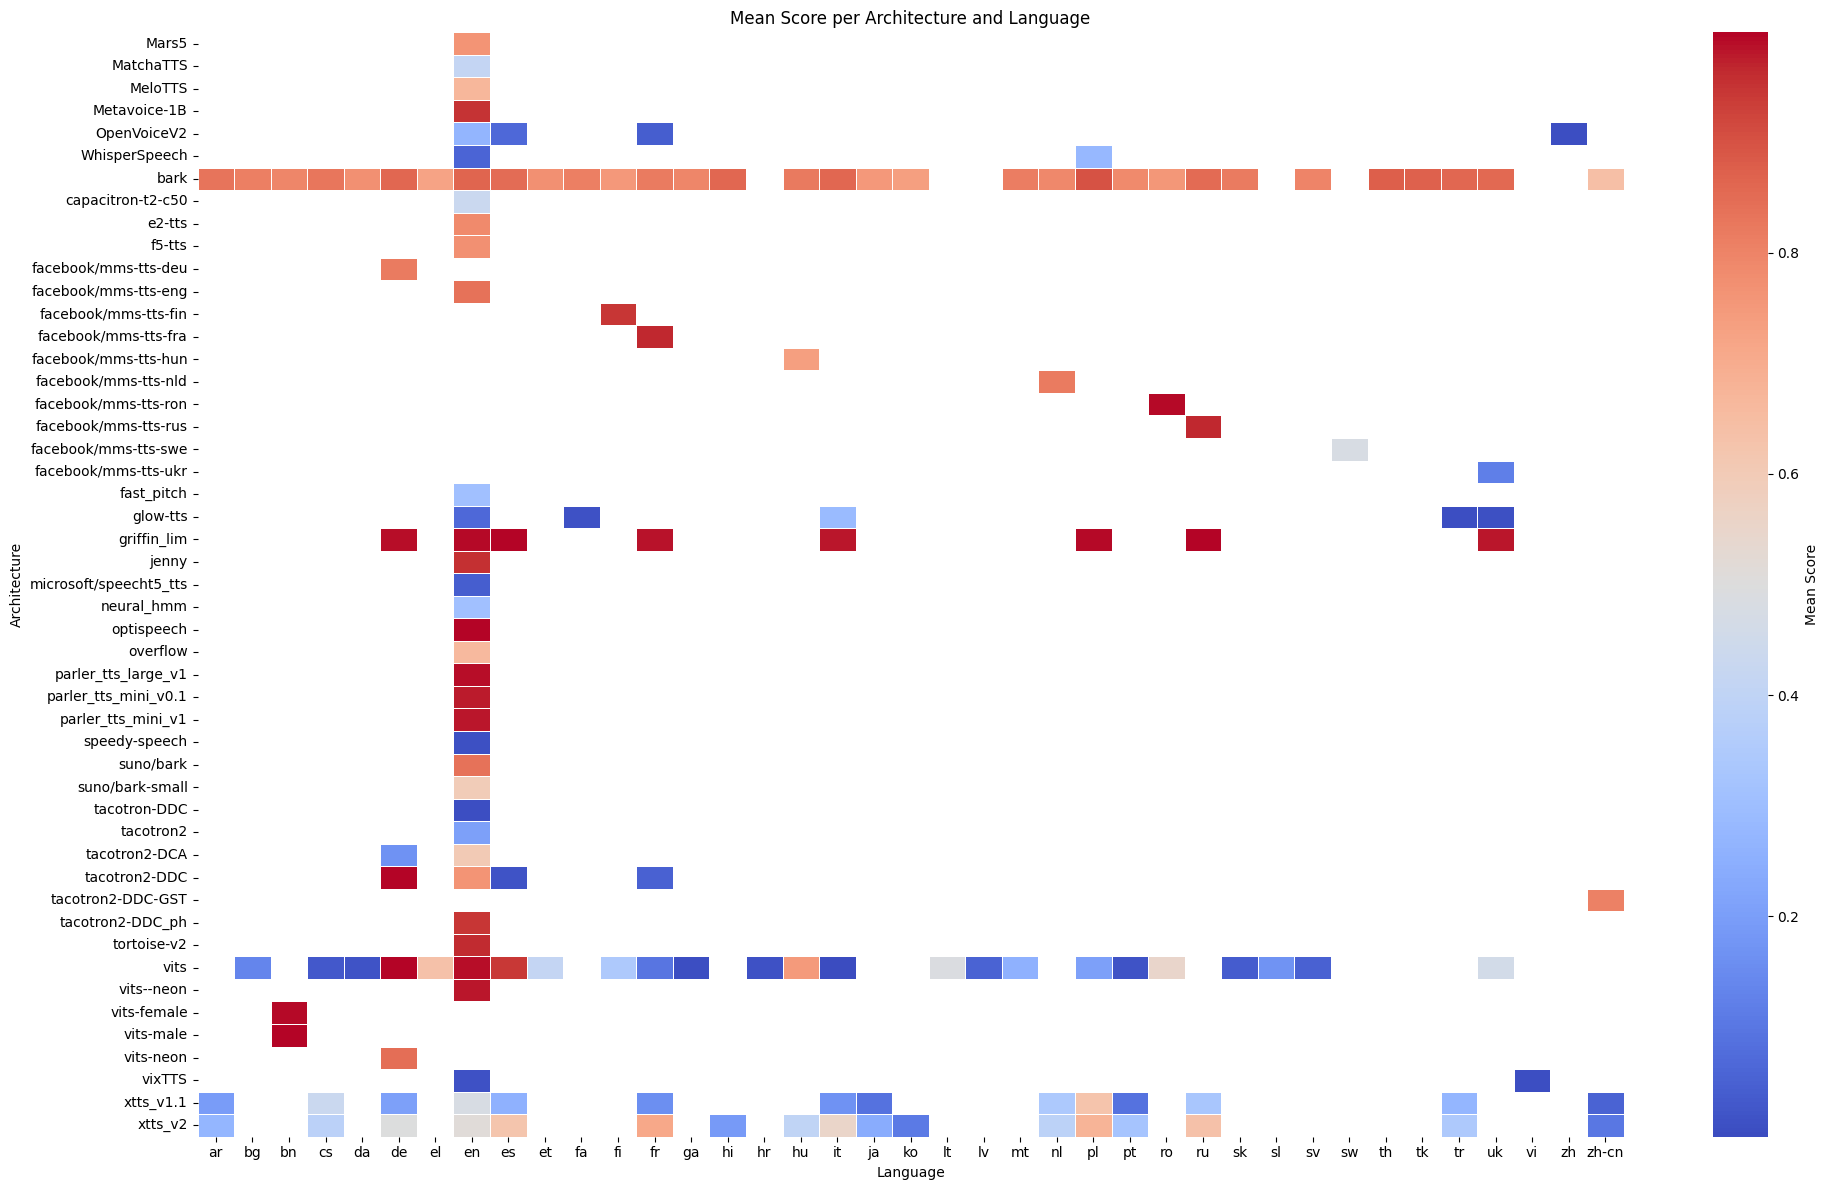

✅ Heatmap saved as 'model_language_heatmap.png'


In [7]:
score_table = df.pivot_table(
    index='architecture',
    columns='language',
    values='score',
    aggfunc='mean'
)

score_table



# === Plot heatmap ===
plt.figure(figsize=(20, 12))  # Adjust size as needed
sns.heatmap(score_table, annot=False, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Mean Score'})
plt.title("Mean Score per Architecture and Language")
plt.xlabel("Language")
plt.ylabel("Architecture")
plt.tight_layout()
plt.savefig("architecture_language_heatmap.png")
plt.show()

print("✅ Heatmap saved as 'model_language_heatmap.png'")

In [10]:
import pandas as pd

# Carrega o CSV
csv_path = "/home/victor.moreno/dl-29_backup/spoof/dataset/code/mlaad_meta_with_scores_and_gender.csv"
df = pd.read_csv(csv_path, sep='|')

# Cria uma tabela de média dos scores por architecture, language e gender
score_gender_table = df.pivot_table(
    index=['architecture', 'gender'],
    columns='language',
    values='score',
    aggfunc='mean'
)

# Exibe a tabela arredondada
score_gender_table
score_gender_table.to_csv("score_by_architecture_language_gender.csv")
